<a href="https://colab.research.google.com/github/diogomattos1/mvp-analise-dados/blob/main/MVP_An%C3%A1lise_Dados_Diogo_Mattos%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP** - Disciplina de Análise de Dados

**Introdução**


Fundada em 1946, a NBA (National Basketball Association) é a principal liga de basquete profissional dos Estados Unidos e do mundo.

Nos últimos anos, foi muito observado e debatido pela imprensa especializada uma mudança na forma de jogar o esporte, com as equipes dando mais ênfase ao ataque do que à defesa e priorizando os arremessos de três pontos.

O objetivo deste trabalho é analisar os dados registrados pela liga ao longo dos anos, para observar como foi esta evolução na forma de jogar, e como isso impactou o esporte.

Como a liga tem atualmente 30 equipes, e cada uma delas disputa 82 partidas na sua temporada regular, isso proporciona uma boa massa de dados para buscarmos fazer esta análise.

A ideia é usar o método de regressão para associar os dados dos arremessos e cestas de 3 pontos com o sucesso das equipes, em número de vitórias por temporada.

O dataset que será base do trabalho foi obtido no site Kaggle: https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats e salvo no github: https://github.com/diogomattos1/mvp-analise-dados/tree/dataset.



**Tratamento de dados**

Para começar, vamos importar as bibliotecas e o arquivo do dataset.

In [2]:
# Importar de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [3]:
# Informar a URL onde o dataset foi armazenado - neste caso, seguindo orientação dos professores, já baixei o arquivo do Kaggle e salvei no Github
url = "https://raw.githubusercontent.com/diogomattos1/mvp-analise-dados/dataset/Team%20Stats%20Per%20Game.csv"

In [4]:
# Ler o arquivo
df = pd.read_csv(url, delimiter=',')

In [5]:
# Mostrar as dimensões do dataframe
df.shape

(1845, 28)

In [6]:
# Mostrar as primeiras linhas
df.head()

,season,lg,team,abbreviation,playoffs,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2024,NBA,Atlanta Hawks,ATL,False,82.0,242.1,43.0,92.5,0.465,...,0.797,12.5,32.2,44.7,26.6,7.5,4.5,13.5,18.6,118.3
1,2024,NBA,Boston Celtics,BOS,True,82.0,241.8,43.9,90.2,0.487,...,0.807,10.7,35.6,46.3,26.9,6.8,6.6,11.9,16.2,120.6
2,2024,NBA,Brooklyn Nets,BRK,False,82.0,241.5,40.7,89.1,0.456,...,0.756,11.4,32.6,44.1,25.6,6.8,5.2,13.1,18.5,110.4
3,2024,NBA,Chicago Bulls,CHI,False,82.0,243.7,42.0,89.5,0.470,...,0.791,11.2,32.6,43.8,25.0,7.8,4.8,12.2,18.8,112.3
4,2024,NBA,Charlotte Hornets,CHO,False,82.0,240.6,40.0,87.0,0.460,...,0.786,9.3,31.0,40.3,24.8,6.9,4.5,13.8,18.0,106.6


Primeiramente, percebemos que o arquivo escolhido não traz a quantidade de vitórias das equipes, informação que seria premissa para fazer a correlação. Desta forma, precisaremos buscar a informação em outro arquivo deste mesmo dataset.

In [12]:
# Informar a URL onde o segundo arquivo do dataset foi armazenado
url2 = "https://raw.githubusercontent.com/diogomattos1/mvp-analise-dados/dataset/Team%20Summaries.csv"

# Ler o segundo arquivo
df2 = pd.read_csv(url2, delimiter=',')

# Mostrar as primeiras linhas do segundo arquivo
df2.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2024,NBA,Atlanta Hawks,ATL,False,26.2,36.0,46.0,36.0,46.0,...,11.6,27.1,0.200,0.572,12.4,75.2,0.192,State Farm Arena,696418.0,16986.0
1,2024,NBA,Boston Celtics,BOS,True,28.2,64.0,18.0,66.0,16.0,...,10.8,24.9,0.180,0.523,10.8,76.3,0.145,TD Garden,766240.0,18689.0
2,2024,NBA,Brooklyn Nets,BRK,False,26.1,32.0,50.0,34.0,48.0,...,11.8,25.2,0.177,0.543,11.4,76.0,0.193,Barclays Center,720291.0,17568.0
3,2024,NBA,Chicago Bulls,CHI,False,28.1,39.0,43.0,37.0,45.0,...,11.0,25.1,0.187,0.556,12.7,76.4,0.195,United Center,845620.0,20625.0
4,2024,NBA,Charlotte Hornets,CHO,False,25.1,21.0,61.0,18.0,64.0,...,12.6,21.1,0.167,0.572,12.3,74.5,0.188,Spectrum Center,674400.0,16449.0


In [13]:
# Mostrar as dimensões do dataset
df2.shape

(1845, 31)

Verificamos que os arquivos possuem o mesmo número de registros. Cada linha de cada arquivo traz os resultados de cada equipe em cada temporada (além de linhas que trazem o agregado de cada temporada). Sabendo disso, agora será necessário fazer uma junção dos dois arquivos.

In [14]:
# Realizar o merge entre os dois arquivos
df_merge = pd.merge(df, df2, on=['season', 'team'])

# Exibir o DataFrame resultante
print(df_merge)

      season lg_x                     team abbreviation_x  playoffs_x     g  \
0       2024  NBA            Atlanta Hawks            ATL       False  82.0   
1       2024  NBA           Boston Celtics            BOS        True  82.0   
2       2024  NBA            Brooklyn Nets            BRK       False  82.0   
3       2024  NBA            Chicago Bulls            CHI       False  82.0   
4       2024  NBA        Charlotte Hornets            CHO       False  82.0   
...      ...  ...                      ...            ...         ...   ...   
1858    1947  BAA  Providence Steamrollers            PRO       False  60.0   
1859    1947  BAA        St. Louis Bombers            STB        True  61.0   
1860    1947  BAA          Toronto Huskies            TRH       False  60.0   
1861    1947  BAA      Washington Capitols            WSC        True  60.0   
1862    1947  BAA           League Average            NaN       False  60.0   

      mp_per_game  fg_per_game  fga_per_game  fg_pe

In [15]:
# Exibir os tipos de cada campo da tabela do dataset
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1863 non-null   int64  
 1   lg_x              1863 non-null   object 
 2   team              1863 non-null   object 
 3   abbreviation_x    1758 non-null   object 
 4   playoffs_x        1863 non-null   bool   
 5   g                 1862 non-null   float64
 6   mp_per_game       1673 non-null   float64
 7   fg_per_game       1862 non-null   float64
 8   fga_per_game      1862 non-null   float64
 9   fg_percent        1862 non-null   float64
 10  x3p_per_game      1411 non-null   float64
 11  x3pa_per_game     1411 non-null   float64
 12  x3p_percent       1411 non-null   float64
 13  x2p_per_game      1862 non-null   float64
 14  x2pa_per_game     1862 non-null   float64
 15  x2p_percent       1862 non-null   float64
 16  ft_per_game       1862 non-null   float64


Percebemos que há colunas redundantes no dataframe (o Pandas as diferenciou acrescentando "_x" ou "_y" ao seu final. Iremos tratar isso excluindo estas colunas duplicadas a seguir.

In [16]:
# Remover as colunas duplicadas no DataFrame resultante
duplicadas = [col for col in df_merge.columns if '_y' in col]
df_merge.drop(duplicadas, axis=1, inplace=True)

Também verificamos que o dataset possui muitas informações. Algumas certamente não serão úteis para a proposta inicial do trabalho. Outras iremos manter, pois podemos avaliar se há outras estatísticas do jogo que tem maior correlação com o sucesso das equipes. Entretanto, como o enfoque é analisar a influência dos arremessos. Dados como rebotes e assistências e estatísticas defensivas das equipes serão descartados.

In [22]:
# Remover as colunas desnecessárias no DataFrame resultante

df_merge.drop('lg_x',  axis=1, inplace=True)
df_merge.drop('orb_per_game',  axis=1, inplace=True)
df_merge.drop('drb_per_game',  axis=1, inplace=True)
df_merge.drop('trb_per_game',  axis=1, inplace=True)
df_merge.drop('ast_per_game',  axis=1, inplace=True)
df_merge.drop('stl_per_game',  axis=1, inplace=True)
df_merge.drop('blk_per_game',  axis=1, inplace=True)
df_merge.drop('tov_per_game',  axis=1, inplace=True)
df_merge.drop('pf_per_game',  axis=1, inplace=True)
df_merge.drop('pw',  axis=1, inplace=True)
df_merge.drop('pl',  axis=1, inplace=True)
df_merge.drop('sos',  axis=1, inplace=True)
df_merge.drop('srs',  axis=1, inplace=True)
df_merge.drop('tov_percent',  axis=1, inplace=True)
df_merge.drop('orb_percent',  axis=1, inplace=True)
df_merge.drop('opp_e_fg_percent',  axis=1, inplace=True)
df_merge.drop('opp_tov_percent',  axis=1, inplace=True)
df_merge.drop('opp_drb_percent',  axis=1, inplace=True)
df_merge.drop('opp_ft_fga',  axis=1, inplace=True)
df_merge.drop('arena',  axis=1, inplace=True)
df_merge.drop('attend',  axis=1, inplace=True)
df_merge.drop('attend_g',  axis=1, inplace=True)
df_merge.drop('age',  axis=1, inplace=True)

In [23]:
# Exibir a quantidade de linhas por coluna
df_merge.count()

,0
season,1863
team,1863
abbreviation_x,1758
playoffs_x,1863
g,1862
mp_per_game,1673
fg_per_game,1862
fga_per_game,1862
fg_percent,1862
x3p_per_game,1411


Outro tratamento será temporal. Como a linha de 3 pontos só foi instituída pela liga na temporada de 1979-80, obviamente os registros anteriores a ela não possuiam esta informação. Então vamos filtrar o nosso dataset com dados apenas após a adoção deste marco.

In [24]:
#Filtrar o dataframe com dados apenas a partir da temporada de 1979-1980
df_filtrado = df_merge[df_merge['season'] > 1979]

# Exibir o DataFrame filtrado
print(df_filtrado)

      season                 team abbreviation_x  playoffs_x     g  \
0       2024        Atlanta Hawks            ATL       False  82.0   
1       2024       Boston Celtics            BOS        True  82.0   
2       2024        Brooklyn Nets            BRK       False  82.0   
3       2024        Chicago Bulls            CHI       False  82.0   
4       2024    Charlotte Hornets            CHO       False  82.0   
...      ...                  ...            ...         ...   ...   
1294    1980   San Diego Clippers            SDC       False  82.0   
1295    1980  Seattle SuperSonics            SEA        True  82.0   
1296    1980            Utah Jazz            UTA       False  82.0   
1297    1980   Washington Bullets            WSB        True  82.0   
1298    1980       League Average            NaN       False  82.0   

      mp_per_game  fg_per_game  fga_per_game  fg_percent  x3p_per_game  ...  \
0           242.1         43.0          92.5       0.465          13.7  ...   
1

Outro ponto observado no dataframe é que ele só possui o numero absoluto de vitórias e derrotas das equipes por temporada. Ao analisar a base, porém, verificamos que algumas temporadas tiveram menos partidas realizadas.

Desta forma, nossa escolha será criar uma nova coluna chamada "w%" (win percentage), que vai trazer o percentual de vitórias de cada equipe por temporada. Este será o índice que será utilizado nas regressões que faremos mais à frente.

In [25]:
# Criando a coluna 'w%' com o percentual da coluna 'w' pela coluna 'g'
df_filtrado['w%'] = df_filtrado.apply(lambda row: row['w'] / row['g'] * 100, axis=1).round(2)

# Exibindo o DataFrame resultante
print(df_filtrado)

      season                 team abbreviation_x  playoffs_x     g  \
0       2024        Atlanta Hawks            ATL       False  82.0   
1       2024       Boston Celtics            BOS        True  82.0   
2       2024        Brooklyn Nets            BRK       False  82.0   
3       2024        Chicago Bulls            CHI       False  82.0   
4       2024    Charlotte Hornets            CHO       False  82.0   
...      ...                  ...            ...         ...   ...   
1294    1980   San Diego Clippers            SDC       False  82.0   
1295    1980  Seattle SuperSonics            SEA        True  82.0   
1296    1980            Utah Jazz            UTA       False  82.0   
1297    1980   Washington Bullets            WSB        True  82.0   
1298    1980       League Average            NaN       False  82.0   

      mp_per_game  fg_per_game  fga_per_game  fg_percent  x3p_per_game  ...  \
0           242.1         43.0          92.5       0.465          13.7  ...   
1

<ipython-input-25-b9da4ca02e1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['w%'] = df_filtrado.apply(lambda row: row['w'] / row['g'] * 100, axis=1).round(2)


In [26]:
# Exibir a quantidade de linhas por coluna após a adoção do filtro
df_filtrado.count()

,0
season,1299
team,1299
abbreviation_x,1254
playoffs_x,1299
g,1299
mp_per_game,1299
fg_per_game,1299
fga_per_game,1299
fg_percent,1299
x3p_per_game,1299


Observamos que, para determinados atributos, o dataframe apresenta menos registros que os demais. Vamos analisá-los a seguir.

In [27]:
# Filtrar as linhas onde a coluna 'w' é vazia
df_media = df_filtrado.loc[df_filtrado['w'].isnull()]

# Exibir o DataFrame resultante
print(df_media)

      season            team abbreviation_x  playoffs_x     g  mp_per_game  \
30      2024  League Average            NaN       False  82.0        241.4   
61      2023  League Average            NaN       False  82.0        241.8   
92      2022  League Average            NaN       False  82.0        241.4   
123     2021  League Average            NaN       False  72.0        241.4   
154     2020  League Average            NaN       False  71.0        241.8   
185     2019  League Average            NaN       False  82.0        241.6   
216     2018  League Average            NaN       False  82.0        241.4   
247     2017  League Average            NaN       False  82.0        241.6   
278     2016  League Average            NaN       False  82.0        241.8   
309     2015  League Average            NaN       False  82.0        242.0   
340     2014  League Average            NaN       False  82.0        242.0   
371     2013  League Average            NaN       False  82.0   

Verificamos que estas linhas apresentam os dados consolidados de cada temporada, pois apresentam o valor "League Average" na coluna "Team". Ou seja, a média de cada temporada.

Vamos manter este dataframe com informações consolidadas, pois elas podem ser úteis para uma análise que ainda será feita neste MVP. Mas excluiremos estes dados do dataframe principal.

In [28]:
# Excluir as linhas onde 'team' é igual a 'league average'
df_filtrado = df_filtrado.drop(df_filtrado.loc[df_filtrado['team'] == 'League Average'].index)

# Exibir o DataFrame resultante
print(df_filtrado)

      season                 team abbreviation_x  playoffs_x     g  \
0       2024        Atlanta Hawks            ATL       False  82.0   
1       2024       Boston Celtics            BOS        True  82.0   
2       2024        Brooklyn Nets            BRK       False  82.0   
3       2024        Chicago Bulls            CHI       False  82.0   
4       2024    Charlotte Hornets            CHO       False  82.0   
...      ...                  ...            ...         ...   ...   
1293    1980    San Antonio Spurs            SAS        True  82.0   
1294    1980   San Diego Clippers            SDC       False  82.0   
1295    1980  Seattle SuperSonics            SEA        True  82.0   
1296    1980            Utah Jazz            UTA       False  82.0   
1297    1980   Washington Bullets            WSB        True  82.0   

      mp_per_game  fg_per_game  fga_per_game  fg_percent  x3p_per_game  ...  \
0           242.1         43.0          92.5       0.465          13.7  ...   
1

Tento feito todo este tratamento dos dados, já podemos exibir um sumário estatístico dos dados.

In [29]:
# Exibe um sumário estatístico (contagem, média, desvio padrão, mínimo, máximo e quartis)
df_filtrado.describe()

,season,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,...,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,ft_fga,w%
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,...,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,2003.124402,80.363636,241.682536,39.065470,84.364035,0.462643,5.845933,16.544896,0.335667,33.222488,...,107.296491,107.288517,0.007974,95.454386,0.302094,0.196490,0.539876,0.497355,0.228457,49.988062
std,12.702646,5.736999,0.837884,3.261027,4.680989,0.020881,3.814045,10.272500,0.045925,5.321605,...,4.332610,4.072370,4.845867,4.859425,0.041086,0.117471,0.023460,0.025989,0.030733,15.325187
min,1980.000000,50.000000,240.000000,30.800000,71.200000,0.401000,0.100000,0.900000,0.104000,23.100000,...,92.200000,94.100000,-15.200000,82.300000,0.194000,0.011000,0.468000,0.424000,0.143000,10.610000
25%,1993.000000,82.000000,241.200000,36.500000,81.000000,0.448000,2.825000,8.425000,0.324000,29.500000,...,104.325000,104.600000,-3.300000,91.525000,0.271000,0.102250,0.524000,0.479000,0.206000,38.000000
50%,2004.000000,82.000000,241.500000,38.800000,84.300000,0.462000,5.500000,15.600000,0.348000,31.300000,...,107.000000,107.300000,0.300000,95.200000,0.301000,0.193000,0.538000,0.494000,0.226500,51.220000
75%,2014.000000,82.000000,242.100000,41.575000,87.800000,0.476000,8.100000,22.500000,0.364000,37.475000,...,110.275000,110.000000,3.500000,99.100000,0.332000,0.271750,0.554750,0.512750,0.250000,60.980000
max,2024.000000,82.000000,244.900000,48.500000,108.100000,0.545000,16.700000,45.400000,0.428000,48.200000,...,123.200000,120.400000,13.400000,113.700000,0.433000,0.519000,0.610000,0.578000,0.334000,89.020000


Podemos observar, primeiramente, que, com os tratamentos realizados anteriormente, não temos mais valores vazios nos campos. Desta forma, a princípio parece ter sido resolvido o problema de valores discrepantes ou inconsistentes.

Também é possivel perceber que, de fato, o maior desvio padrão entre todas as estatísticas de jogo é na coluna *x3pa_per_game* (arremessos de 3 pontos por partida), o que indica que este item do esporte evoluiu em um ritmo diferente dos demais aspectos.



In [ ]:
#Excluir colunas com valores texto do Dataframe de médias
dataframe_medias.drop('team',  axis=1, inplace=True)
dataframe_medias.drop('playoffs_x',  axis=1, inplace=True)

In [67]:
# Calcular o desvio padrão de cada coluna
std_values = dataframe_medias.std()

# Ordenando os valores em ordem decrescente pelo desvio padrão
sorted_columns = std_values.sort_values(ascending=False)

# Obter as 5 colunas com os maiores desvios padrão
top_columns = std_values.nlargest(5)

# Exibir o nome das colunas
print(top_columns.index, top_columns.std)



Index(['season', 'x2pa_per_game', 'x3pa_per_game', 'pts_per_game', 'g'], dtype='object') <bound method Series.std of season           13.133926
x2pa_per_game    11.039594
x3pa_per_game    10.014684
pts_per_game      6.306174
g                 5.631083
dtype: float64>


Feito este pré-processamento, podemos começar a trabalhar com os gráficos, para tentar obter mais insights sobre o dataset.



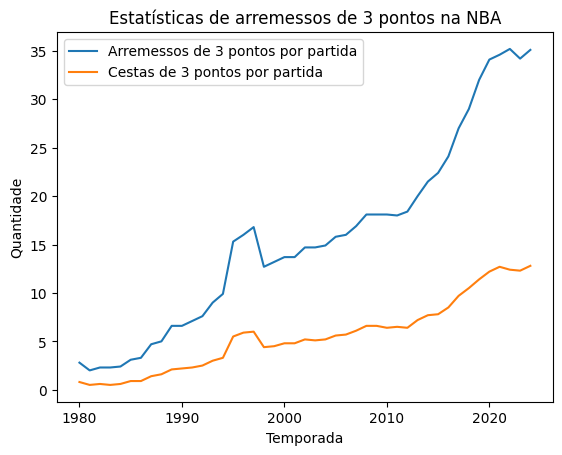

In [68]:
# Importar biblioteca  de exemplo
import matplotlib.pyplot as plt

# Configurações do gráfico
plt.plot(dataframe_medias.season, dataframe_medias.x3pa_per_game, label='Arremessos de 3 pontos por partida')
plt.plot(dataframe_medias.season, dataframe_medias.x3p_per_game, label='Cestas de 3 pontos por partida')

plt.xlabel('Temporada')
plt.ylabel('Quantidade')
plt.title('Estatísticas de arremessos de 3 pontos na NBA')

plt.legend()  # Exibe a legenda com as linhas correspondentes

plt.show()  # Exibe o gráfico

Após importar a biblioteca Matplotlib, conseguimos exibir um gráfico com a evolução das tentativas e das cestas de 3 ao longo da história da liga. Podemos observar após o ano de 2010 um crescimento acima da tendência.

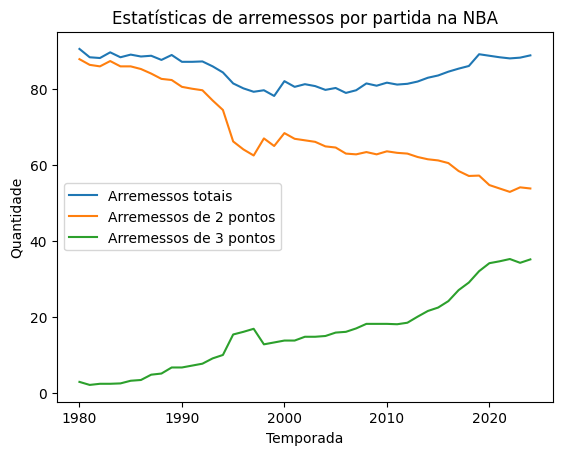

In [71]:
plt.plot(dataframe_medias.season, dataframe_medias.fga_per_game, label='Arremessos totais')
plt.plot(dataframe_medias.season, dataframe_medias.x2pa_per_game, label='Arremessos de 2 pontos')
plt.plot(dataframe_medias.season, dataframe_medias.x3pa_per_game, label='Arremessos de 3 pontos')


plt.xlabel('Temporada')
plt.ylabel('Quantidade')
plt.title('Estatísticas de arremessos por partida na NBA')

plt.legend()  # Exibe a legenda com as linhas correspondentes

plt.show()  # Exibe o gráfico

Agora uma outra abordagem: um gráfico comparando a quantidade de arremessos de 3 pontos e de arremessos totais ao longo dos anos. Fica mais evidente que as tentativas de 3 pontos evoluíram constantemente, em detrimento das tentativas de 2 pontos; enquanto que os arremessos em geral se mantiveram relativamente estáveis.

In [ ]:
# Gráfico de Linhas

# selecionando apenas os atributos para serem plotados em um novo dataframe, sem a classe
atributos = dataset_consolidado.columns.drop(['especie'])

# criando o eixo x - vai de 0 até a quantidade de linhas do dataset iris - de 0 a 149
x_data = range(0, iris.shape[0])

# plotando cada atributo
for atributo in atributos: # esse for percorre a lista: ['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala']
    plt.plot(x_data, iris[atributo], label=atributo)

# incluindo título do gráfico e legenda
plt.title('Variação dos atributos do dataset Iris')
plt.legend();

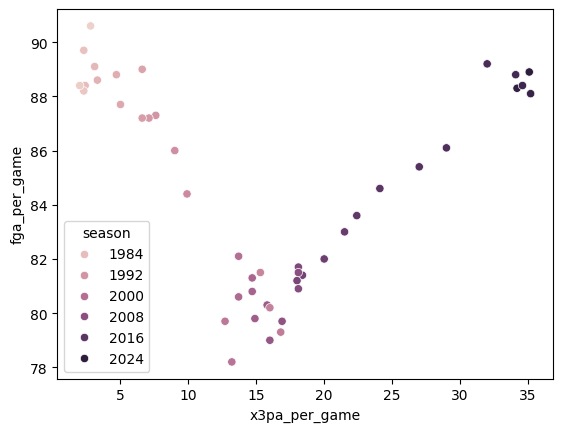

In [ ]:
import seaborn as sns

# scatter plot com Seaborn colorido por classes
sns.scatterplot(x=dataset_consolidado.x3pa_per_game, y=dataset_consolidado.fga_per_game, hue= dataset_consolidado.season);

Aqui apresentamos uma outra visão, onde percebemos o avanço das tentativas de 3 pontos ao longo dos anos. Já os arremessos de 2 pontos tiveram uma queda no início dos anos 2000 para depois retomarem a patamares mais parecidos com o dos anos 1980.

Isso mostra que, na verdade, tivemos nos últimos anos um aumento do número de arremessos como um todo.

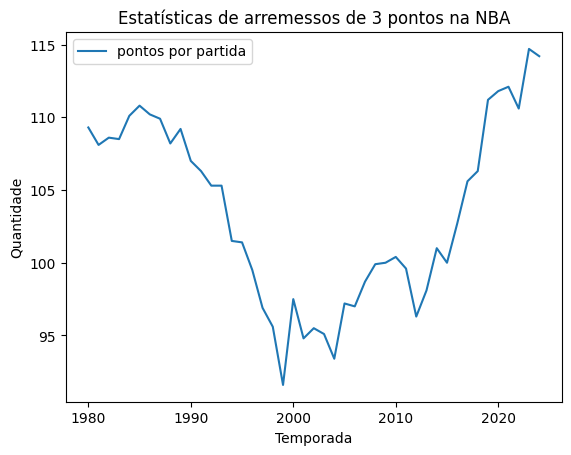

In [ ]:
# Configurações do gráfico
plt.plot(dataset_consolidado.season, dataset_consolidado.pts_per_game, label='pontos por partida')
#plt.plot(dataset_consolidado.season, dataset_consolidado.x3p_per_game, label='Cestas de 3 pontos por partida')

plt.xlabel('Temporada')
plt.ylabel('Quantidade')
plt.title('Estatísticas de arremessos de 3 pontos na NBA')

plt.legend()  # Exibe a legenda com as linhas correspondentes

plt.show()  # Exibe o gráfico